In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [2]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [3]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#importing ml models to use
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [5]:
# Load the dataset using pandas csv function
loan=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CLIENTS/2.pratikgautam/ML project /Loan_Modelling.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/CLIENTS/2.pratikgautam/ML project /Loan_Modelling.csv'

## Data Overview

* Observations
* Sanity checks

In [ ]:
# Randomly checking 5 rows for data understanding
loan.sample(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
874,875,30,4,40,92056,4,2.1,3,0,0,0,0,1,1
1818,1819,45,20,62,95818,2,2.2,3,0,0,0,0,1,0
2987,2988,33,7,39,92037,2,2.0,3,0,0,0,0,0,0
2301,2302,38,13,84,93403,4,0.7,3,0,0,0,0,0,0
4101,4102,45,21,40,93460,3,0.6,2,0,0,0,0,1,1


In [ ]:
# To check the number of rows and columns
loan.shape

(5000, 14)

In [ ]:
# To check the datatypes of features
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
# To check if missing data is present
loan.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
# To check if the duplicated rows are present
duplicated_rows=loan[loan.duplicated()]
duplicated_rows.shape[0]

0

In [ ]:
# To find out the summary statistics
loan.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


**Initial Observations**
- The data has 5000 rows and 14 features.
- The data is quite clean as it has no missing values. All the features has appropraite data types. There is no duplicated row present in the data as well.
- Income: Average income is 73,774 with a standard deviation of $46,033, indicating significant variability. It's a crucial factor for loan eligibility and willingness to take on additional financial obligations.

- CCAvg: Average monthly spending on credit cards suggests spending habits and financial stability. Higher spending could indicate a greater capacity to repay loans.

- Education: Average education level is around 1.88, potentially reflecting financial literacy and understanding of loan terms. Higher education levels may correlate with a higher likelihood of accepting a personal loan offer.

- CD_Account: Presence of a CD account implies a pre-existing relationship and trust with the bank, possibly influencing the decision to accept a personal loan offer.

- Online: Use of online banking facilities reflects comfort with digital services and may impact the likelihood of accepting a personal loan offer, especially if the loan application process is online.

- There is one discripancy present in the experience feature as it contains the negative values as well. We will deal with them in data preprocessing.


## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

##Univariate analysis

In [ ]:
# Count the number of customers with credit cards (where CreditCard = 1)
num_customers_with_credit_cards = loan['CD_Account'].sum()

print("Number of customers with credit cards:", num_customers_with_credit_cards)

Number of customers with credit cards: 302


In [ ]:
loan['CD_Account'].value_counts()

0    4698
1     302
Name: CD_Account, dtype: int64

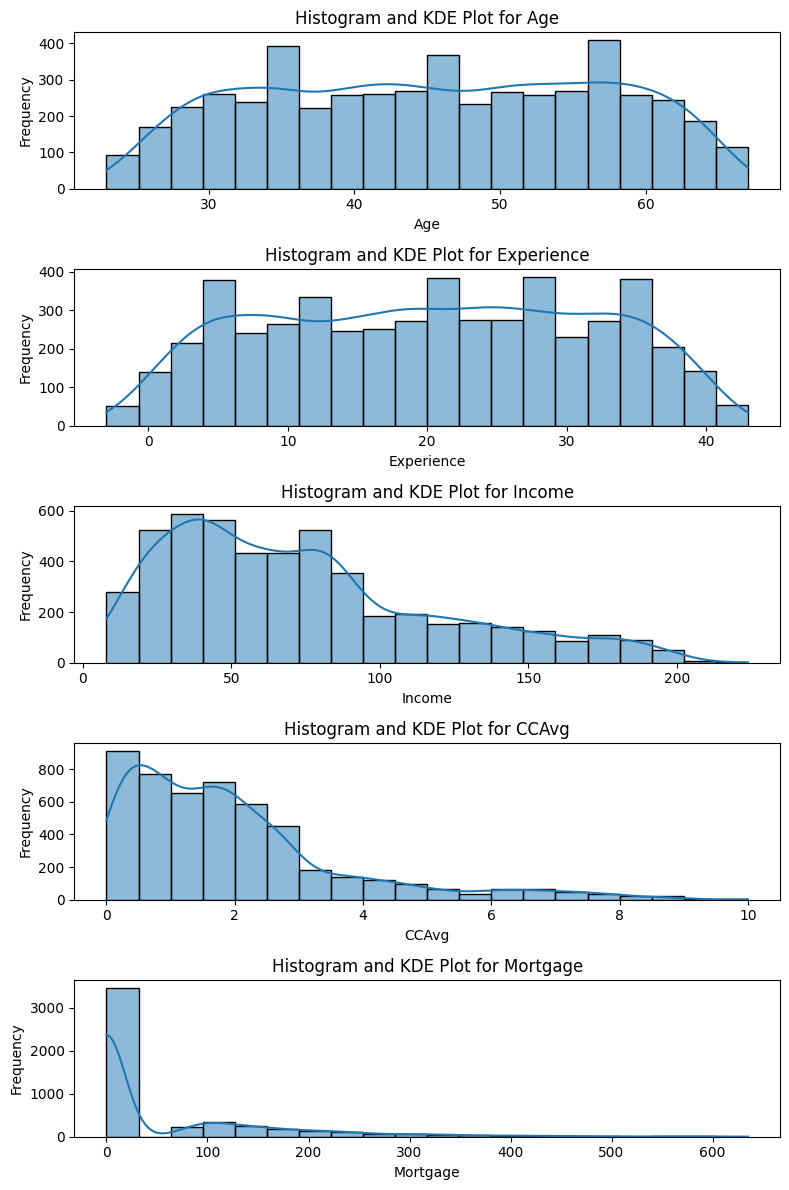

In [ ]:
# Set up the figure and axes
fig, axes = plt.subplots(5, 1, figsize=(8, 12))

# Variables to plot
variables = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

# Iterate over variables
for i, var in enumerate(variables):
    # Plot histogram
    sns.histplot(data=loan, x=var, kde=True, ax=axes[i], bins=20)
    # Set title
    axes[i].set_title(f'Histogram and KDE Plot for {var}')
    # Set labels
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
# Show plot
plt.show()

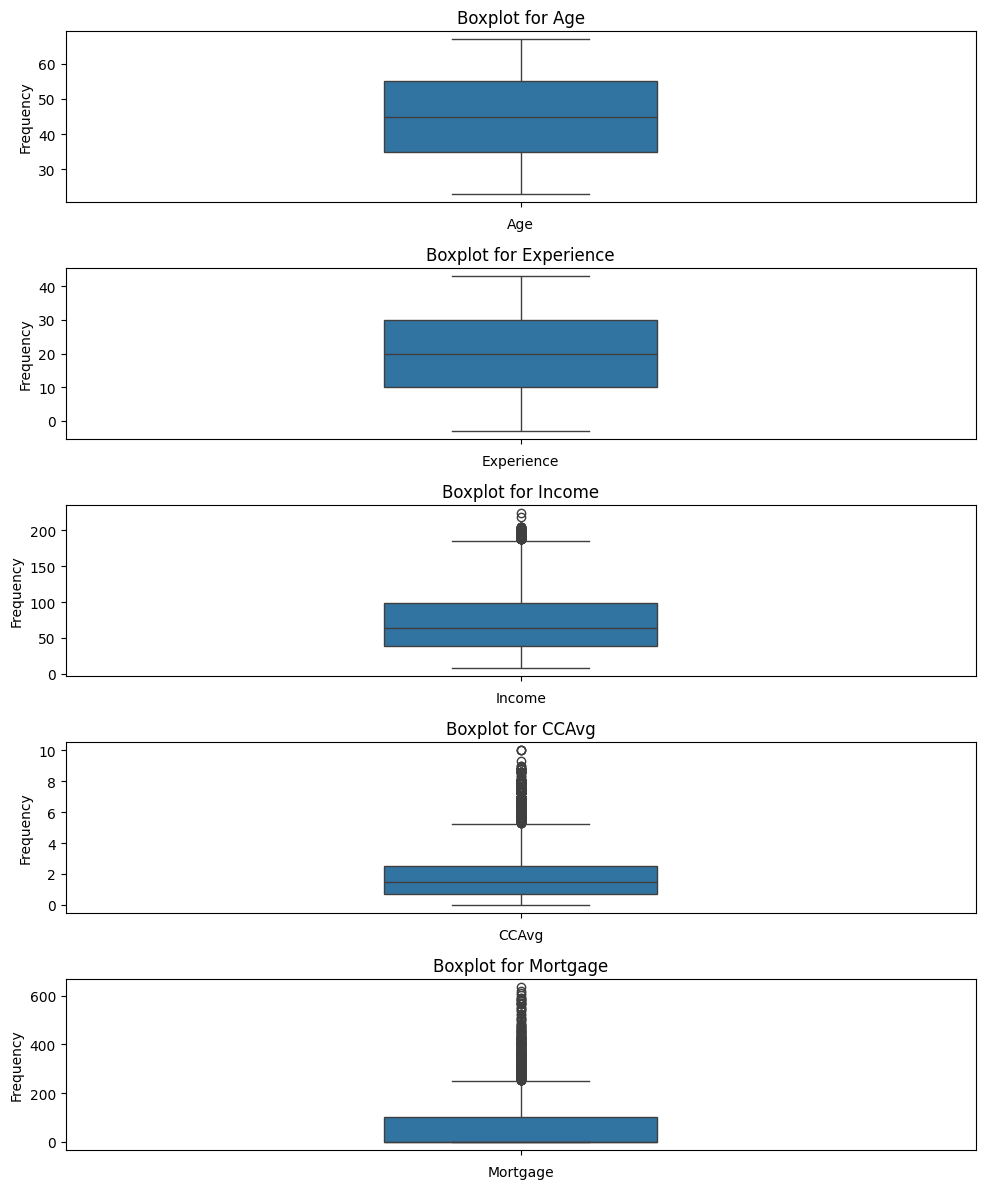

In [ ]:
# Set up the figure and axes
fig, axes = plt.subplots(5, 1, figsize=(10, 12))

# Iterate over variables
for i, var in enumerate(variables):
    # Add boxplot
    sns.boxplot(data=loan, y=var, ax=axes[i], width=0.3)
    # Set title
    axes[i].set_title(f'Boxplot for {var}')
    # Set labels
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
# Show plot
plt.show()

In [ ]:
loan['Personal_Loan'].value_counts()/5000*100

0    90.4
1     9.6
Name: Personal_Loan, dtype: float64

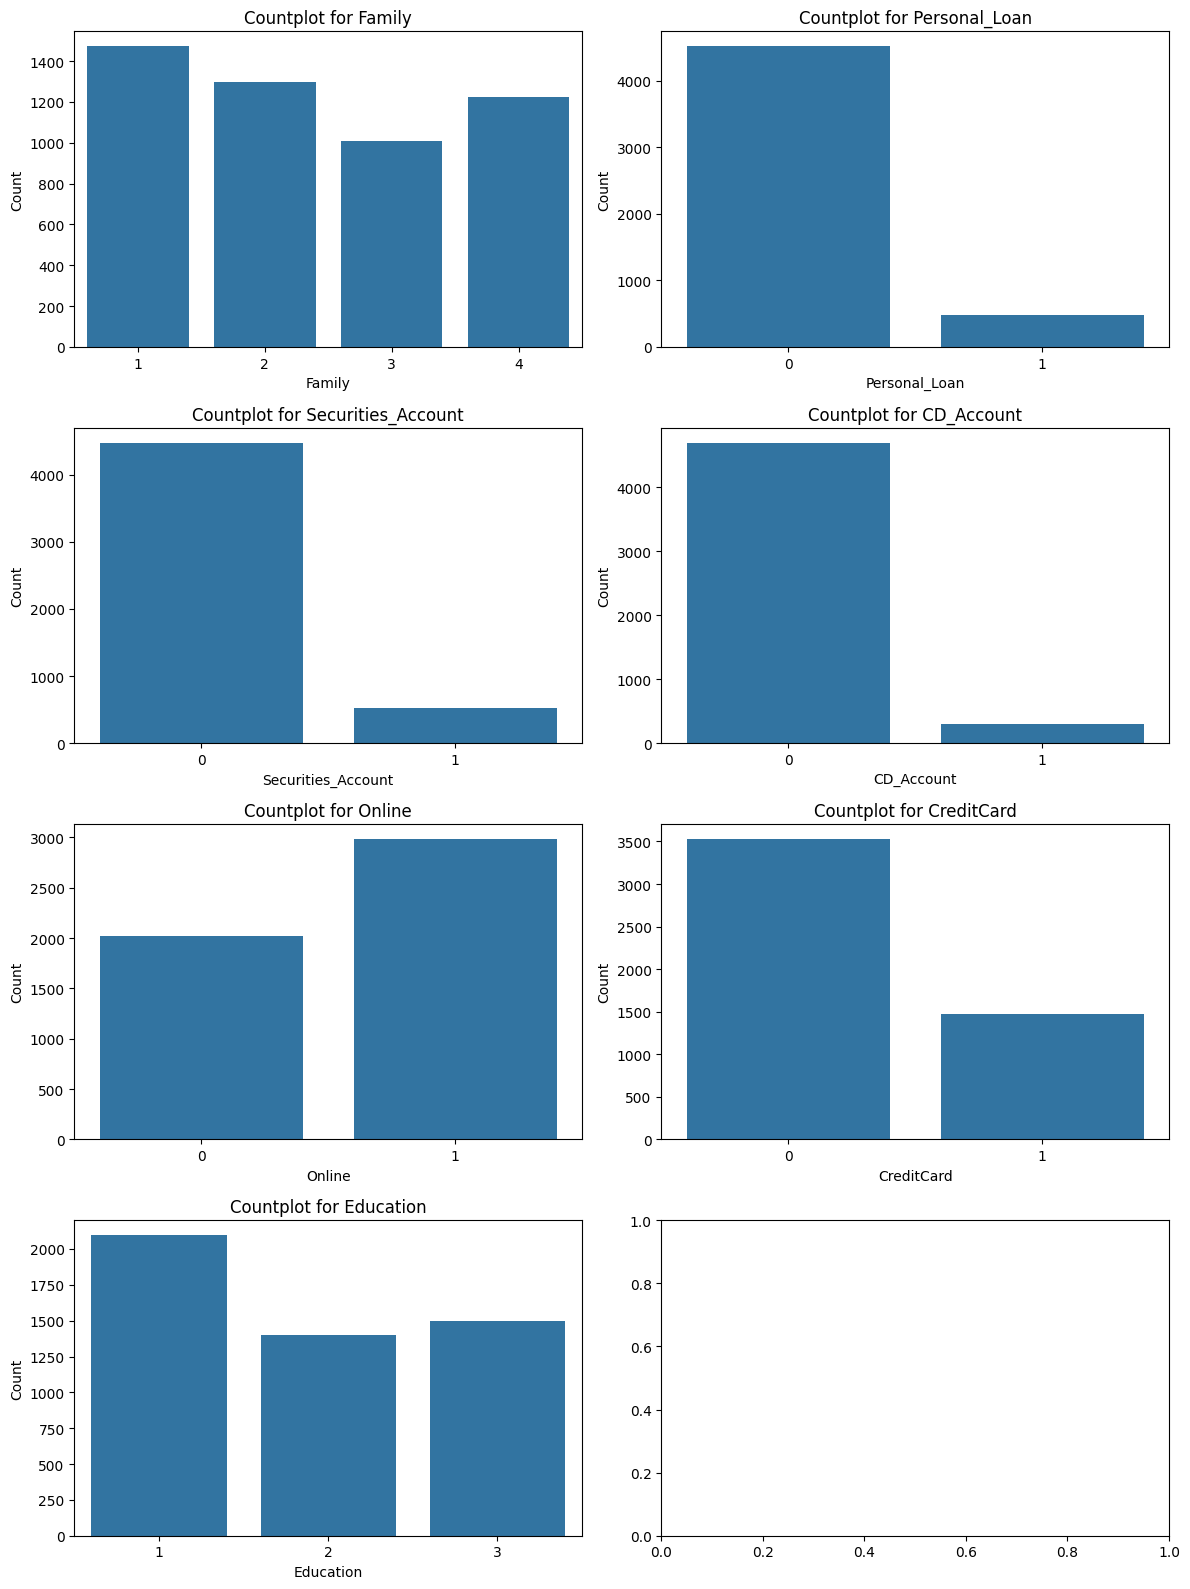

In [ ]:
# Set up the figure and axes
fig, axes = plt.subplots(4, 2, figsize=(12, 16))

# Variables to plot
variables = ['Family', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Education']

# Flatten axes for iteration
axes = axes.flatten()

# Iterate over variables
for i, var in enumerate(variables):
    # Plot countplot
    sns.countplot(data=loan, x=var, ax=axes[i])
    # Set title
    axes[i].set_title(f'Countplot for {var}')
    # Set labels
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
# Show plot
plt.show()

##Bivariate analysis

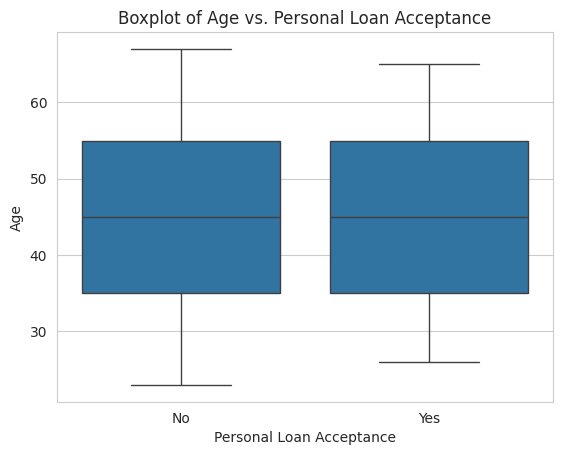

In [ ]:
# Set the style of the plot
sns.set_style("whitegrid")

# Create a boxplot
sns.boxplot(data=loan, x='Personal_Loan', y='Age')
plt.title('Boxplot of Age vs. Personal Loan Acceptance')
plt.xlabel('Personal Loan Acceptance')
plt.ylabel('Age')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

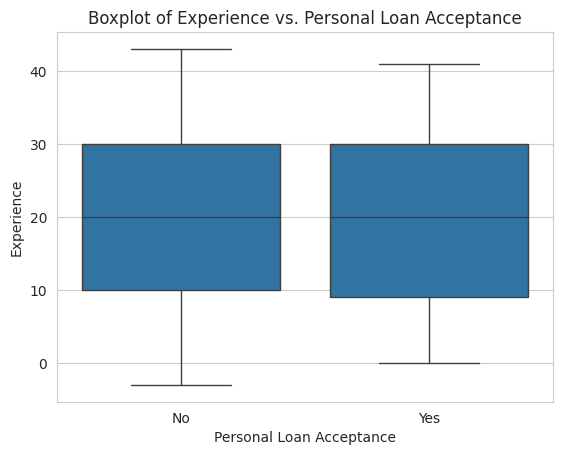

In [ ]:
# Set the style of the plot
sns.set_style("whitegrid")

# Create a boxplot
sns.boxplot(data=loan, x='Personal_Loan', y='Experience')
plt.title('Boxplot of Experience vs. Personal Loan Acceptance')
plt.xlabel('Personal Loan Acceptance')
plt.ylabel('Experience')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

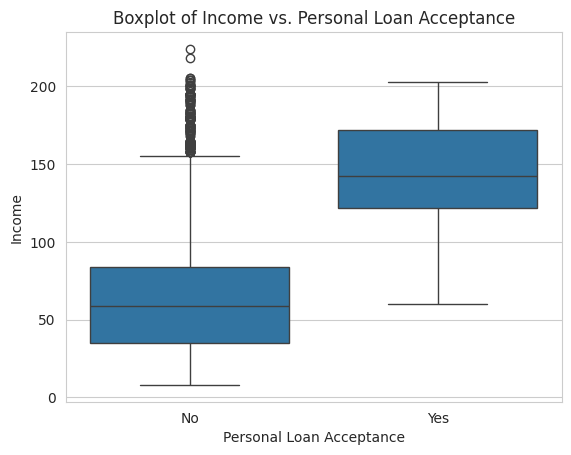

In [ ]:
# Set the style of the plot
sns.set_style("whitegrid")

# Create a boxplot
sns.boxplot(data=loan, x='Personal_Loan', y='Income')
plt.title('Boxplot of Income vs. Personal Loan Acceptance')
plt.xlabel('Personal Loan Acceptance')
plt.ylabel('Income')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

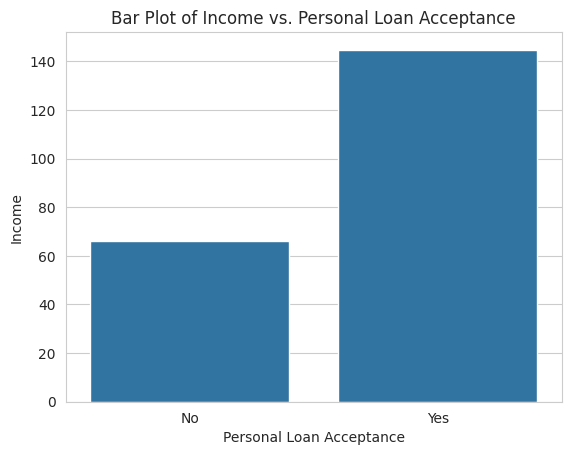

In [ ]:
# Set the style of the plot
sns.set_style("whitegrid")

# Create a bar plot
sns.barplot(data=loan, x='Personal_Loan', y='Income', ci=None)
plt.title('Bar Plot of Income vs. Personal Loan Acceptance')
plt.xlabel('Personal Loan Acceptance')
plt.ylabel('Income')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

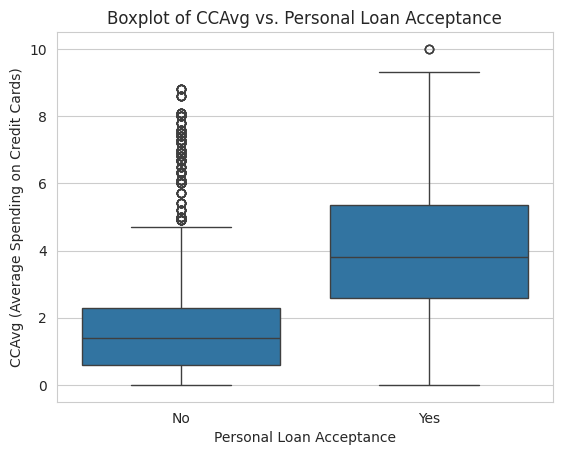

In [ ]:
# Set the style of the plot
sns.set_style("whitegrid")

# Create a boxplot
sns.boxplot(data=loan, x='Personal_Loan', y='CCAvg')
plt.title('Boxplot of CCAvg vs. Personal Loan Acceptance')
plt.xlabel('Personal Loan Acceptance')
plt.ylabel('CCAvg (Average Spending on Credit Cards)')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

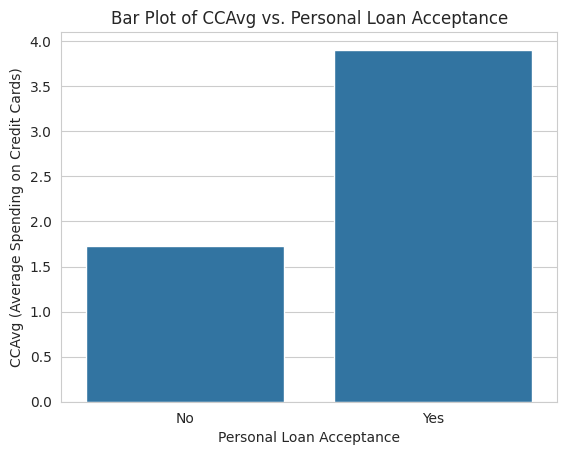

In [ ]:
# Set the style of the plot
sns.set_style("whitegrid")

# Create a bar plot
sns.barplot(data=loan, x='Personal_Loan', y='CCAvg', ci=None)
plt.title('Bar Plot of CCAvg vs. Personal Loan Acceptance')
plt.xlabel('Personal Loan Acceptance')
plt.ylabel('CCAvg (Average Spending on Credit Cards)')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

In [ ]:
# Convert Mortgage feature into categorical
loan['Mortgage_Categorical'] = loan['Mortgage'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
loan['Mortgage_Categorical'].value_counts()

0    3462
1    1538
Name: Mortgage_Categorical, dtype: int64

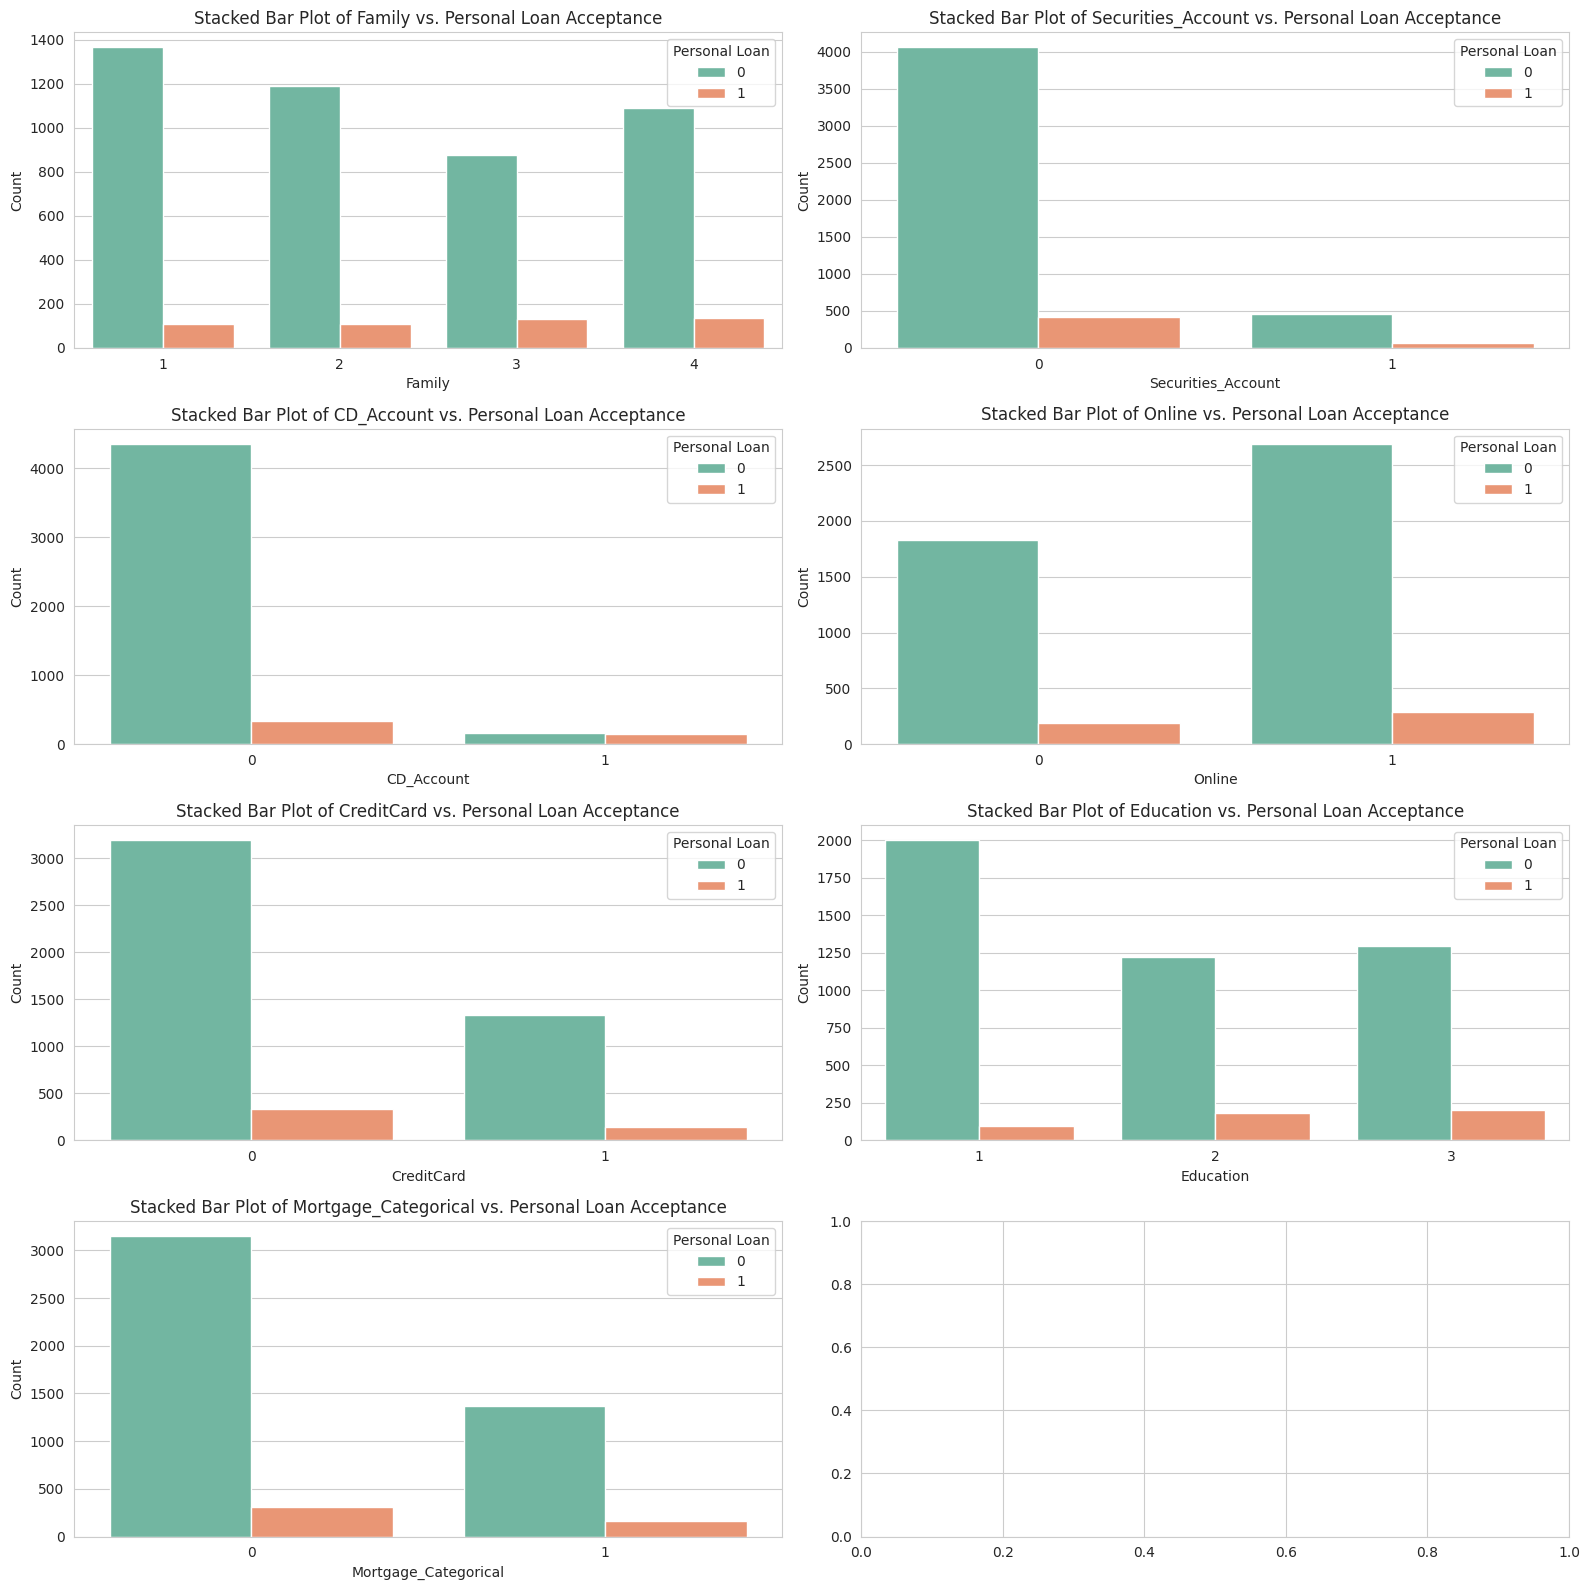

In [ ]:
# Define the categorical features
categorical_features = ['Family', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Education', 'Mortgage_Categorical']

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 16))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Iterate over the categorical features and create stacked bar plots
for i in range(len(categorical_features)):
    sns.countplot(data=loan, x=categorical_features[i], hue='Personal_Loan', ax=axes[i], palette='Set2')
    axes[i].set_title(f'Stacked Bar Plot of {categorical_features[i]} vs. Personal Loan Acceptance')
    axes[i].set_xlabel(categorical_features[i])
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Personal Loan', loc='upper right')

# Adjust layout
plt.tight_layout()
plt.show()

## Data Preprocessing

* Missing value treatment (No need as there are no missing values present)
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

##Feature engineering

###Remove negative values from Experience feature

In [ ]:
loan["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [ ]:
# checking for experience <0
loan[loan["Experience"] < 0]["Experience"].unique()

array([-1, -2, -3])

In [ ]:
# Correcting the experience values
loan["Experience"].replace(-1, 1, inplace=True)
loan["Experience"].replace(-2, 2, inplace=True)
loan["Experience"].replace(-3, 3, inplace=True)

In [ ]:
# checking for experience <0
loan[loan["Experience"] < 0]["Experience"].unique()

array([], dtype=int64)

###Convert ZIPCode into categorical feature

In [ ]:
loan["ZIPCode"].nunique()

467

In [ ]:
loan["ZIPCode"] = loan["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    loan["ZIPCode"].str[0:2].nunique(),
)
loan["ZIPCode"] = loan["ZIPCode"].str[0:2]

loan["ZIPCode"] = loan["ZIPCode"].astype("category")

Number of unique values if we take first two digits of ZIPCode:  7


##Outlier detection and treatment

In [ ]:
# Calculate the IQR for 'Income' and 'CCAvg'
Q1_income = loan['Income'].quantile(0.25)
Q3_income = loan['Income'].quantile(0.75)
IQR_income = Q3_income - Q1_income

Q1_ccavg = loan['CCAvg'].quantile(0.25)
Q3_ccavg = loan['CCAvg'].quantile(0.75)
IQR_ccavg = Q3_ccavg - Q1_ccavg

# Define the lower and upper bounds for outlier detection
lower_bound_income = Q1_income - 1.5 * IQR_income
upper_bound_income = Q3_income + 1.5 * IQR_income

lower_bound_ccavg = Q1_ccavg - 1.5 * IQR_ccavg
upper_bound_ccavg = Q3_ccavg + 1.5 * IQR_ccavg

# Remove outliers from 'Income' and 'CCAvg' features
loan_no_outliers = loan[(loan['Income'] >= lower_bound_income) & (loan['Income'] <= upper_bound_income) &
                        (loan['CCAvg'] >= lower_bound_ccavg) & (loan['CCAvg'] <= upper_bound_ccavg)]

# Display the shape before and after applying the method
print("Shape before removing outliers:", loan.shape)
print("Shape after removing outliers:", loan_no_outliers.shape)

Shape before removing outliers: (5000, 15)
Shape after removing outliers: (4623, 15)


##Removing un necessary features

In [ ]:
# Remove 'ID', 'ZIPCode', and 'Mortgage' columns from the dataset
loan_no_outliers.drop(['ID', 'Mortgage'], axis=1, inplace=True)

#Preparing data for modeling

##Making features and target

In [ ]:
# Define the input features (X) and output feature (y)
X = loan_no_outliers.drop(columns=['Personal_Loan'])
y = loan_no_outliers['Personal_Loan']

##Splitting data into training and test set

In [ ]:
# Splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Display the shapes of the training and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3698, 12)
Shape of y_train: (3698,)
Shape of X_test: (925, 12)
Shape of y_test: (925,)


##Scaling

In [ ]:
# Scaling the features separately for training and test sets
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##Handling imbalanced data using SMOTE

- Due to the highly imbalanced distribution of the target variable, with only 9.6 of data points belonging to the loan category and remaining to the no loan category, using traditional machine learning algorithms may lead to biased models. To address this issue, I plan to employ the Synthetic Minority Over-sampling Technique (SMOTE) for oversampling. This technique aims to create a more balanced distribution of both classes, allowing the algorithm to generalize effectively and avoid biases towards the overrepresented class.

In [ ]:
# Using SMOTE to balance the target class in the training set only
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

## Model Building

### Model Evaluation Criterion

##4.7.Machine Learning approach discussion

      Machine Learning Models used
- K-Nearest Neighbors
- Decision Tree Classifier
- Random Forest Classifier
- Gradient Boosting Classifier
- Support Vector Classifier
- Logistic Regression
- XGBClassifier
- Ada Boost
- Stochastic Gradient
- BaggingClassifier

      Evaluation metrics used are

- 1.Accuracy Score
- 2.Classification Report
- 3.Confusion Matrix

      1.Accuracy

- Accuracy is a common evaluation metric used in classification problems to measure the percentage of correctly predicted instances out of the total number of instances. It is calculated as the ratio of the number of correct predictions to the total number of predictions. A high accuracy score indicates a good performance of the model in predicting the correct class labels. However, it may not be an appropriate metric for imbalanced datasets, where the distribution of classes is not equal.


        2.Classification report

- A classification report is a performance evaluation metric used in machine learning to assess the quality of a classification model. It summarizes the precision, recall, F1 score, and support for each class in the classification task. The report provides insights into how well the model performs for different classes and how well it balances between precision and recall.

- **A.Precision**: Precision is the ratio of true positives to the sum of true positives and false positives. It measures the proportion of correctly identified positive instances out of all instances predicted as positive by the model. High precision means the model is highly confident in its predictions.If a model gives 0.8 precision for a class 1 it means that when it predicts for a class 1 it is 80% sure or confident that this observation belongs to this class 1

- **B.Recall**: Recall is the ratio of true positives to the sum of true positives and false negatives. It measures the proportion of positive instances that were correctly identified by the model. High recall means the model can identify most of the positive instances.

- **C.F1 Score**: The F1 score is the harmonic mean of precision and recall. It is a balanced metric that takes both precision and recall into account. It provides a single score that summarizes the performance of a model across both metrics. High F1 score means the model has high precision and recall, indicating a good overall performance.


      3.Confusion Matrix

- A confusion matrix is a performance evaluation metric that shows the count of true positives, false positives, true negatives, and false negatives for each class in a classification problem. It provides a way to evaluate the performance of a classification model by comparing the predicted and true class labels. Confusion matrix gives us insights that where the model is confusing, which class label is being confused with other class label. By analyzing confusion matrix we can improve the model by adding more instances of a particular class label and etc.


      Choosing Machine Learning model
- Choosing a machine learning model is a hectic task. The main idea listed in Hands On Machine Learning book is that we apply  a bunch of algortihms with default hyperparameters on the dataset and choose the one or one's with highest performance and than perform the grid search cv to find the best parameters for that best performing model or models.So, I am going to follow this approach in this project.

### Model Building

In [ ]:
# Set a random seed for reproducibility
np.random.seed(42)

# Applying cross validation of 5 folds with all the models with default parameters
knn = KNeighborsClassifier(n_neighbors=2)
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
lgc = LogisticRegression()
svc = SVC()
xgb = XGBClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
sgc = SGDClassifier()
bc = BaggingClassifier()
models = [knn, dtc, rfc, lgc, svc, xgb, abc, gbc, sgc, bc]
model_names = ["KNearestNeighbor", "Decision Tree", "Random Forest", "Logistic Regression", "Support Vector",
               "XGBClassifier", "Ada Boost", "Gradient Boosting", "Stochastic Gradient", "BaggingClassifier"]
mean_score = []

for model, name in zip(models, model_names):
    cross_score = cross_val_score(model, X_train, y_train, cv=5)
    print("Cross validation scores for {} model are {}".format(name, cross_score))
    average_score = np.mean(cross_score)
    mean_score.append(average_score)
    print("Mean cross validation score for {} model is {}".format(name, average_score))
    print("-" * 100)

Cross validation scores for KNearestNeighbor model are [0.98983297 0.9869281  0.9869281  0.9956427  0.98909884]
Mean cross validation score for KNearestNeighbor model is 0.9896861436219622
----------------------------------------------------------------------------------------------------
Cross validation scores for Decision Tree model are [0.96877269 0.98329702 0.98983297 0.98838054 0.98473837]
Mean cross validation score for Decision Tree model is 0.983004319298779
----------------------------------------------------------------------------------------------------
Cross validation scores for Random Forest model are [0.98402324 0.99346405 0.99709513 0.99419027 0.99273256]
Mean cross validation score for Random Forest model is 0.992301050480485
----------------------------------------------------------------------------------------------------
Cross validation scores for Logistic Regression model are [0.91793755 0.92737836 0.93536674 0.92011619 0.92005814]
Mean cross validation score f

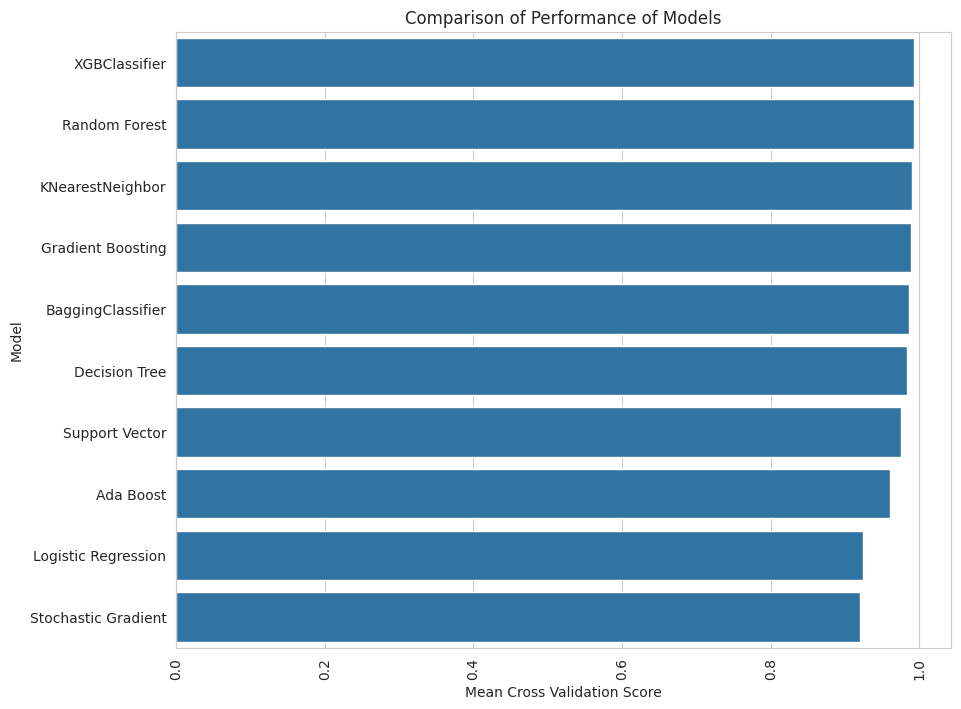

In [ ]:
# plotting bar chart to compare the model performances and pointing out the best one
plt.figure(figsize=(10, 8))
sns.barplot(y=model_names, x=mean_score, order=np.array(model_names)[np.argsort(mean_score)[::-1]])
plt.title("Comparison of Performance of Models")
plt.xlabel("Mean Cross Validation Score")
plt.ylabel("Model")
plt.xticks(rotation=90)
plt.show()

### Model Performance Improvement

In [ ]:
# Set a random seed for reproducibility
np.random.seed(42)

# Define the parameter grid for XGBoost
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}
# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(xgb, param_distributions=param_grid, n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Display the best parameters and the corresponding accuracy score
print("Best Parameters: ", random_search.best_params_)
print("Best Accuracy Score: ", random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters:  {'subsample': 0.9, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.9}
Best Accuracy Score:  0.9940443920893077


## Model Comparison and Final Model Selection

In [ ]:
# initiating the model
xgb = XGBClassifier(subsample=0.9, n_estimators=200, min_child_weight=1, max_depth=5, learning_rate=0.1, colsample_bytree=0.9)

# fitting the model
xgb.fit(X_train,y_train)

# getting prediciton on the testing set
y_pred_xgb = xgb.predict(X_test)

# computing the accuracy score
score_xgb = metrics.accuracy_score(y_test,y_pred_xgb)

print("Accuracy Score of XGBoost on the testing set is {}".format(score_xgb))

Accuracy Score of XGBoost on the testing set is 0.987027027027027


In [ ]:
# computing classification report
report_xgb = metrics.classification_report(y_test,y_pred_xgb)
print("Classification Report of XGBoost")
print(report_xgb)

Classification Report of XGBoost
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       852
           1       0.93      0.90      0.92        73

    accuracy                           0.99       925
   macro avg       0.96      0.95      0.95       925
weighted avg       0.99      0.99      0.99       925



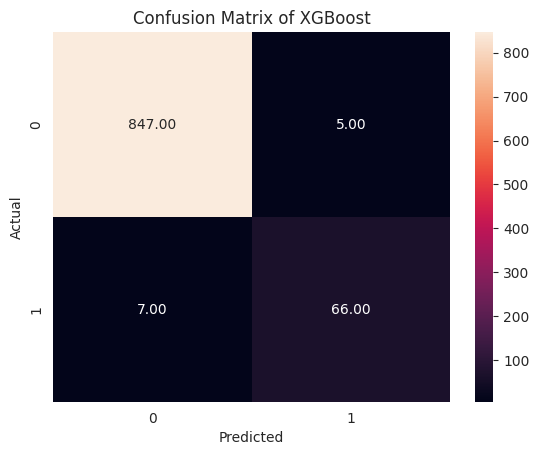

In [ ]:
# computing confuion matrix
matrix_xgb = metrics.confusion_matrix(y_test,y_pred_xgb)

# visualizing confusion matrix using heatmap
sns.heatmap(matrix_xgb,annot=True,fmt=".2f")
plt.title("Confusion Matrix of XGBoost")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

___